# Numerical Modelling
The main objective of our model is to predict the break-up of the ice, however, we don't have a lot of ice-related observations. Typically we have less that 10 measurement from the beginning of the year until break up, but we have extensive temperature data. Taking this thing into consideration we  are re-visiting Stefan's formula introduced in the first week of MUDE.

Lets consider Ashton's formula an improved version of Stefan's formula [[1]](https://static1.1.sqspcdn.com/static/f/572109/18056158/1336339358653/thin+ice+growth.pdf?token=9mlCTJ8q6DFV3imaaSj54iHJW%2FQ%3D)

$$\frac{dH}{dt}=\left(\frac{1}{\rho L}\right)\frac{T_m-T}{\frac{h}{k}+\frac{1}{H_{ia}}}$$


(all value from Wolfram Alpha knowledge database)
- Ice density - $\rho=997.048 [kg/m^3] $
- Ice heat of fusion(specific) -  $L=334000 [J/kg]$
- Ice fusion temperature - $T_m=0[°C]$
- Ice thermal conductivity - $k=0.598 [W/(m °C)]$
- Heat transfer coeficient -$H_{ia}=20 [W/(m^2 °C)]$

then, the ice thickness over time can be expressed as function of 

$$H=f(T,t)$$

:::{card} Ex 1. 
Solve the ODE using  Sympy
:::

In [1]:
import sympy as sp

# Define the symbols
t = sp.symbols('t')
H = sp.Function('H')(t)
H_0=0
rho, L, T_m, T, h, k, H_ia = sp.symbols('rho L T_m T h k H_ia')

# Define the ODE
ode = sp.Eq(H.diff(t), (1/(rho * L)) * (T_m - T) / (H/k + 1/H_ia))

ics = {H.subs(t, 0): H_0}

solution_with_ics = sp.dsolve(ode, H, ics=ics)

# Display the particular solution
solution_with_ics


Eq(H(t), (-k + sqrt(L*rho*(-2*H_ia**2*T*k*t + 2*H_ia**2*T_m*k*t + L*k**2*rho))/(L*rho))/H_ia)

The previous expression presuposed that $T$ is not a function of time, but as we saw in the previous sections, temperature does changes over time.


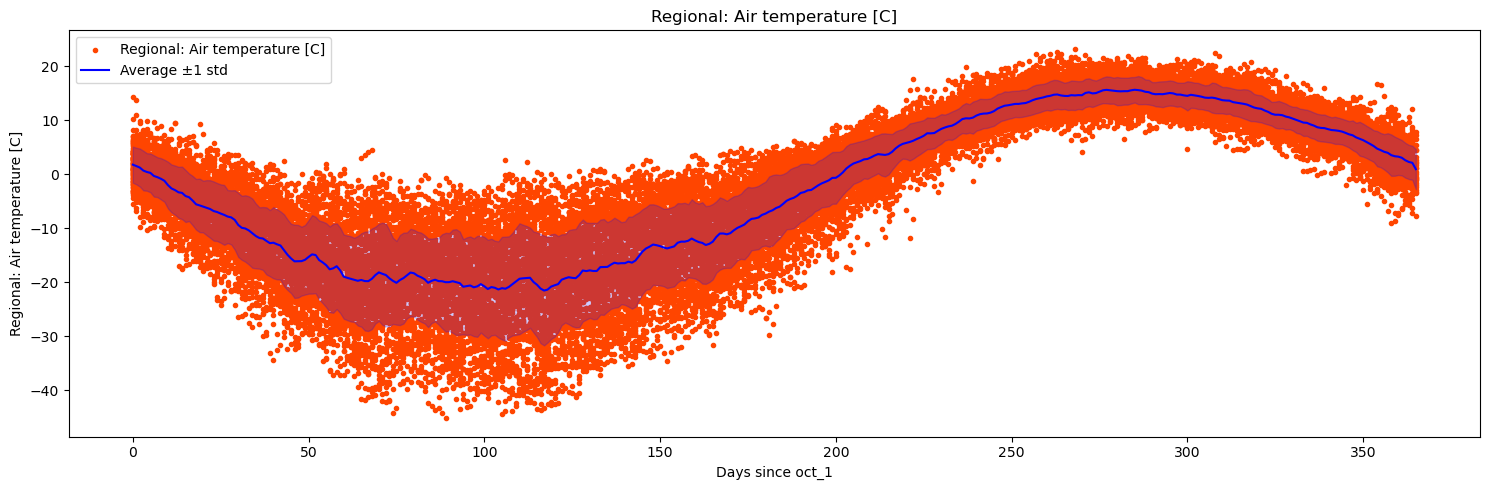

In [2]:
from funciones import*
import pandas as pd
import matplotlib.pyplot as plt
Data=pd.read_csv("../../data/Time_series_DATA.txt",skiprows=149,index_col=0)
Data=Data.drop(columns=['Predicted ice thickness [m]','Noisy predicted ice thickness [m]','Global: Pacific decadal oscillation index','Global: Artic oscillation index'])
#Data=pd.read_csv('https://raw.githubusercontent.com/iceclassic/sandbox/main/Data/Time_series_DATA.txt',index_col=0,skiprows=149)
Data.index = Data.index.astype(str).str.split().str[0]
Data.index = pd.to_datetime(Data.index, format="%Y-%m-%d")



Data=days_since_last_date(Data,date_or_dates='10/01',name='oct_1')
seasonal_trends(Data,k=1,plot_mean_std=True,columns_to_plot=['Regional: Air temperature [C]'],xaxis='oct_1')


## Analytical Solution - Sympy

### Solve ODE numerically and compute solution using numerical integration
- Trap
- Simpson
- Gauss
### Finite Difference
- FE
- BE
- RK -family RK4
- Advanced methods
    - MultyStepMethods (P-C)
    - Milne
    - Adams
    - Mention stability and stiff equation considertion


>Do we really need this **advanced methods**  for our particular problem?  
- Introduce basic flow-chart for choosing the method *a priori* 


## Limitations due to data?
 see next section